# NAME : MENSAH EMMANUEL

# INDEX NUMBER : 4293620

# COURSE NAME : ATMOSPHERIC SCIENCE FIELD WORK

# COURSE CODE : MET 359

In [1]:
#Importing libraries

import xarray as xr
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from cartopy import crs, feature
import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
Saudi_Arabia=xr.open_dataset('Saudi_Arab.nc', engine='netcdf4')
Saudi_Arabia=Saudi_Arabia.where(Saudi_Arabia !=-99)
Saudi_Arabia

<xarray.Dataset>
Dimensions:   (datetime: 3653, lat: 65, lon: 86)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2012-01-01 2012-01-02 ... 2021-12-31
  * lon       (lon) float32 34.5 34.75 35.0 35.25 35.5 ... 55.0 55.25 55.5 55.75
  * lat       (lat) float32 32.5 32.25 32.0 31.75 31.5 ... 17.25 17.0 16.75 16.5
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue May 02 02:56:29 2023: cdo mergetime PERSIANN_Saudi_Arab...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [3]:
# data variable
Arabia = Saudi_Arabia['precip']
Arabia

<xarray.DataArray 'precip' (datetime: 3653, lat: 65, lon: 86)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2012-01-01 2012-01-02 ... 2021-12-31
  * lon       (lon) float32 34.5 34.75 35.0 35.25 35.5 ... 55.0 55.25 55.5 55.75
  * lat       (lat) float32 32.5 32.25 32.0 31.75 31.5 ... 17.25 17.0 16.75 16.5
Attributes:
    grid_mapping:  crs

In [4]:
# selecting a point data
Saudi = Arabia.sel(lon=(43.5),lat=(25.5), method='nearest')
Saudi

<xarray.DataArray 'precip' (datetime: 3653)>
array([0.  , 0.  , 0.  , ..., 1.68, 0.  , 0.  ], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2012-01-01 2012-01-02 ... 2021-12-31
    lon       float32 43.5
    lat       float32 25.5
Attributes:
    grid_mapping:  crs

In [5]:
# select datetime for project
datetime= Saudi.sel(datetime=slice('2012','2021'))
datetime

<xarray.DataArray 'precip' (datetime: 3653)>
array([0.  , 0.  , 0.  , ..., 1.68, 0.  , 0.  ], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2012-01-01 2012-01-02 ... 2021-12-31
    lon       float32 43.5
    lat       float32 25.5
Attributes:
    grid_mapping:  crs

# 1. COMPUTING THE TOTAL MONTHLY RAINFALL AND CLIMATOLOGIES FOR EACH MONTH

In [6]:
Arab_monthly_totals = datetime.resample(datetime='1M').sum('datetime')
Arab_monthly_totals

<xarray.DataArray 'precip' (datetime: 120)>
array([0.0000000e+00, 1.7800000e+00, 2.2800000e+00, 3.1719999e+01,
       3.8500001e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 2.0899999e+00, 1.7910000e+01, 0.0000000e+00,
       2.0100000e+00, 8.4000003e-01, 9.0399990e+00, 2.3959999e+01,
       1.5580000e+01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 2.2700000e+00, 4.4999999e-01,
       1.0469999e+01, 0.0000000e+00, 2.2970001e+01, 9.1099997e+00,
       2.2099998e+01, 2.8000000e-01, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 8.1599998e+00, 4.9000001e-01,
       0.0000000e+00, 2.5000000e-01, 5.6009998e+01, 2.2500000e+00,
       1.6830000e+01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.2749999e+01, 1.6700001e+00, 1.2890000e+01,
       0.0000000e+00, 9.1000004e+00, 1.6740000e+01, 5.3760002e+01,
       2.2990002e+01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.5670000e+01, 2.5400000e+00,
       2.0000000e-01, 3.9200001e+00, 1.5160001e+01, 4.2690002e+01,
       2.0900002e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.2900000e+00, 0.0000000e+00,
       0.0000000e+00, 2.9370001e+01, 2.9770000e+01, 1.3831000e+02,
       2.3959999e+01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 4.4289997e+01, 6.7199997e+01, 0.0000000e+00,
       2.2030001e+01, 9.6230003e+01, 2.2263998e+02, 2.3937000e+02,
       3.3208002e+02, 8.0299997e+00, 2.0000000e+00, 4.1000000e-01,
       0.0000000e+00, 1.7700000e+00, 1.1500000e+00, 4.5999998e-01,
       5.4899998e+00, 6.4800000e+00, 2.9300001e+00, 4.3820000e+01,
       4.4000004e+01, 3.4999999e-01, 5.0000000e-01, 3.1000000e-01,
       0.0000000e+00, 0.0000000e+00, 8.8999996e+00, 4.6199999e+00,
       1.2200000e+00, 5.1700001e+00, 0.0000000e+00, 3.3880001e+01,
       8.8000000e-01, 0.0000000e+00, 1.0250000e+01, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.3080000e+01],
      dtype=float32)
Coordinates:
    lon       float32 43.5
    lat       float32 25.5
  * datetime  (datetime) datetime64[ns] 2012-01-31 2012-02-29 ... 2021-12-31
Attributes:
    grid_mapping:  crs

In [7]:
Arab_monthly_climatology = Arab_monthly_totals.groupby('datetime.month').mean('datetime')
Arab_monthly_climatology

<xarray.DataArray 'precip' (month: 12)>
array([ 4.1419997, 15.314    , 37.753998 , 61.887    , 48.435997 ,
        0.866    ,  1.275    ,  0.072    ,  0.       ,  6.0899997,
       12.422    ,  4.453    ], dtype=float32)
Coordinates:
    lon      float32 43.5
    lat      float32 25.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    grid_mapping:  crs

# 2. COMPUTING THE ANNUAL TOTALS AND AVERAGE ACROSS SAUDI ARABIA FOR THE PRODUCE OF TIMESRIES ON YEAR-TO-YEAR CHANGES AND TRENDS

In [8]:
annual_totals = datetime.groupby('datetime.year').sum()
annual_totals

<xarray.DataArray 'precip' (year: 10)>
array([ 59.63    ,  54.15    ,  73.58    , 102.65    , 120.8     ,
        65.350006, 332.90002 , 926.17    , 117.4     ,  74.48    ],
      dtype=float32)
Coordinates:
    lon      float32 43.5
    lat      float32 25.5
  * year     (year) int64 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
Attributes:
    grid_mapping:  crs

In [9]:
annual_average = datetime.groupby('datetime.year').mean('datetime')
annual_average

<xarray.DataArray 'precip' (year: 10)>
array([0.1629235 , 0.14876375, 0.20269974, 0.2812329 , 0.33005464,
       0.17904112, 0.91205484, 2.537452  , 0.32076502, 0.2040548 ],
      dtype=float32)
Coordinates:
    lon      float32 43.5
    lat      float32 25.5
  * year     (year) int64 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
Attributes:
    grid_mapping:  crs

In [10]:
year = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

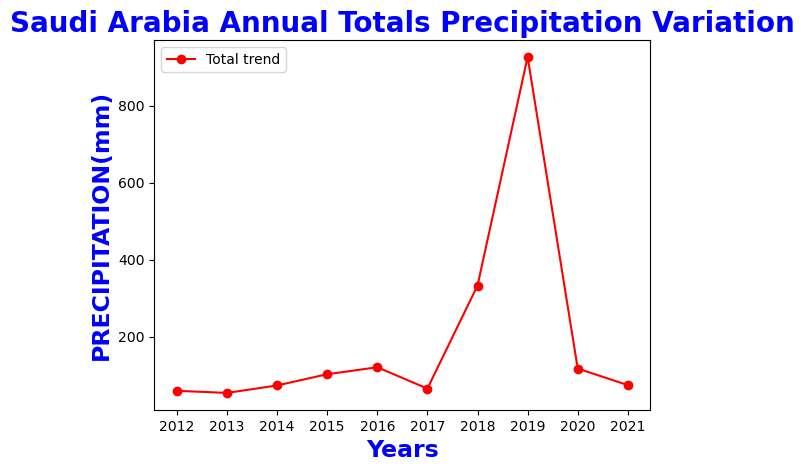

In [11]:
#Time series on the year to year trends and changes.

plt.plot(year, annual_totals, marker ='o', color = 'red',label='Total trend')
plt.xlabel('Years',fontweight = 'bold', fontsize = 17, color = 'blue')
plt.ylabel('PRECIPITATION(mm)', fontweight = 'bold', fontsize = 17,color = 'blue')
plt.title('Saudi Arabia Annual Totals Precipitation Variation', fontweight ='bold' , fontsize = 20, color ='blue');
plt.legend()
plt.savefig('Annual_Total_timeseries_Q2.png')
plt.show()

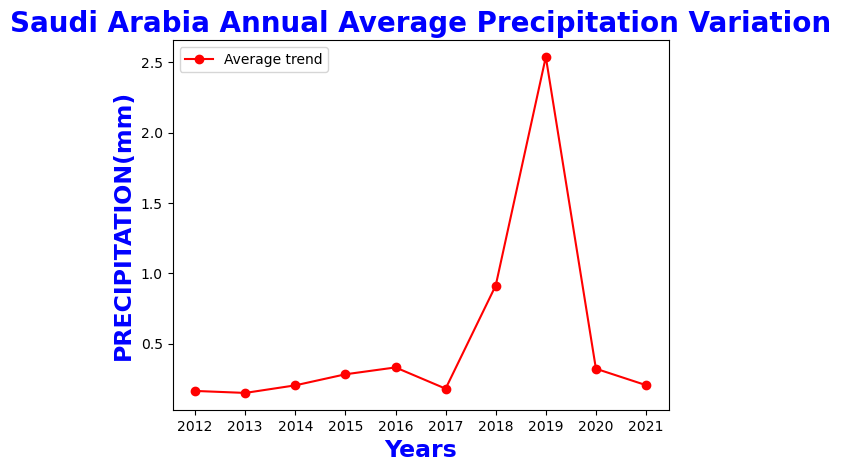

In [12]:
plt.plot(year, annual_average, marker ='o', color = 'red',label='Average trend')
plt.xlabel('Years',fontweight = 'bold', fontsize = 17, color = 'blue')
plt.ylabel('PRECIPITATION(mm)', fontweight = 'bold', fontsize = 17,color = 'blue')
plt.title('Saudi Arabia Annual Average Precipitation Variation', fontweight ='bold' , fontsize = 20, color ='blue');
plt.legend()
plt.savefig('Annual_Average_timeseries_Q2.png')
plt.show()

# 3. COMPUTING THE NUMBER OF DRY AND WET DAYS PER MONTH AND PER YEAR TO PRODUCE SPATIAL PLOTS AND TIMESERIES PRODUCING THE SPATIAL PLOTS PER MONTH AND PER YEAR

In [13]:
# COMPUTING THE NUMBER FOR WET (RR>=1mm) AND DRY(RR<1) 
wet_days = Arabia.where(Arabia >= 1)
dry_days = Arabia.where(Arabia < 1)

In [14]:
# per month
wet_days_per_month = wet_days.groupby('datetime.month').sum(dim='datetime')
dry_days_per_month = dry_days.groupby('datetime.month').sum(dim='datetime')

In [15]:
# per year
wet_days_per_year = wet_days.resample(datetime='1Y').sum(dim='datetime')
dry_days_per_year = dry_days.resample(datetime='1Y').sum(dim='datetime')

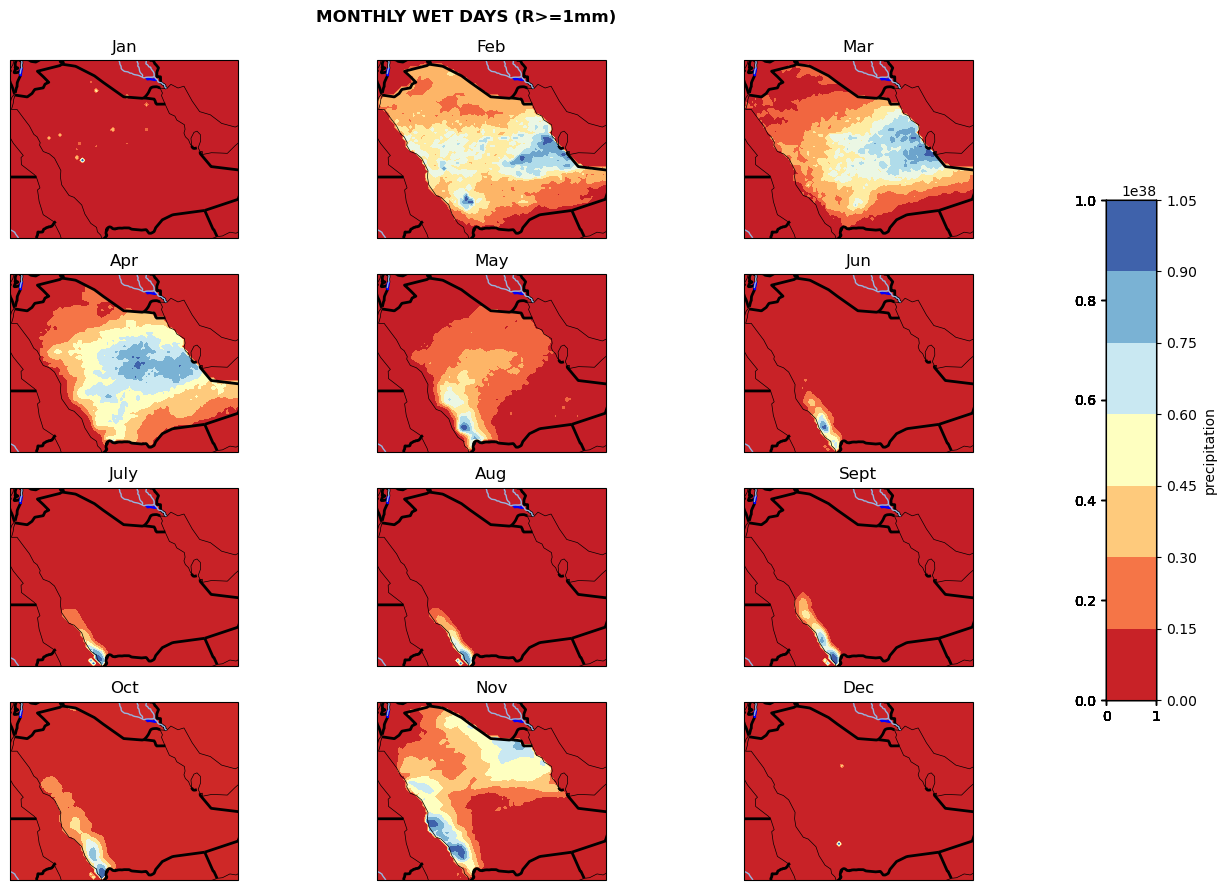

In [16]:
 #SPATIAL PLOTS FOR MONTHLY DRY  DAYS
fig,ax=plt.subplots(4,3,figsize=(20,10), 
                   subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([34.5,55.0,32.5,16.5])
    ax[i].set_title(month[i])
    cb= ax[i].contourf(wet_days_per_month.lon, wet_days_per_month.lat, wet_days_per_month[i],
                       cmap='RdYlBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY WET DAYS (R>=1mm)', fontweight='bold');
plt.savefig('Monthly Wet Days Q3.png');

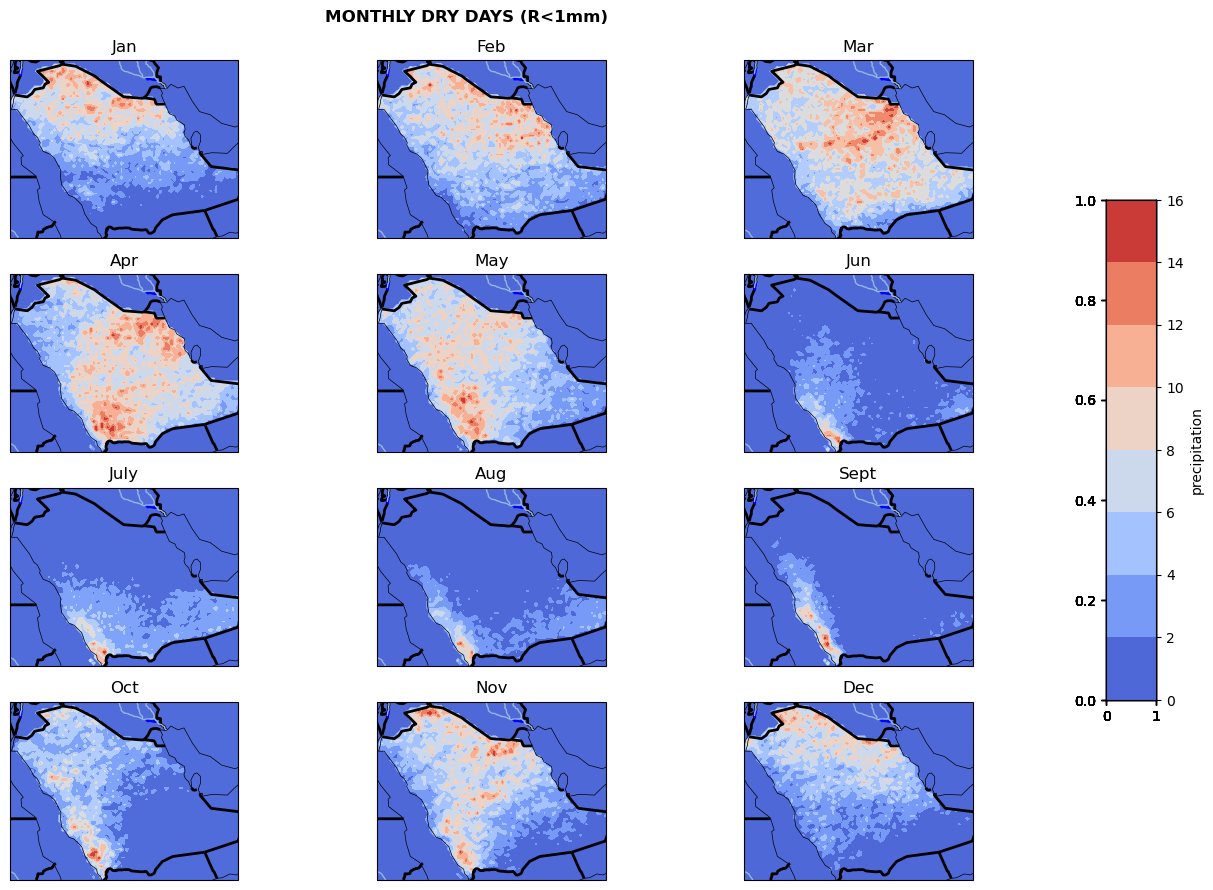

In [17]:
fig,ax=plt.subplots(4,3,figsize=(20,10), 
                   subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([34.5,55.0,32.5,16.5])
    ax[i].set_title(month[i])
    cb= ax[i].contourf(dry_days_per_month.lon, dry_days_per_month.lat, dry_days_per_month[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY DRY DAYS (R<1mm)', fontweight='bold');
plt.savefig('Monthly Dry Days Q3.png');

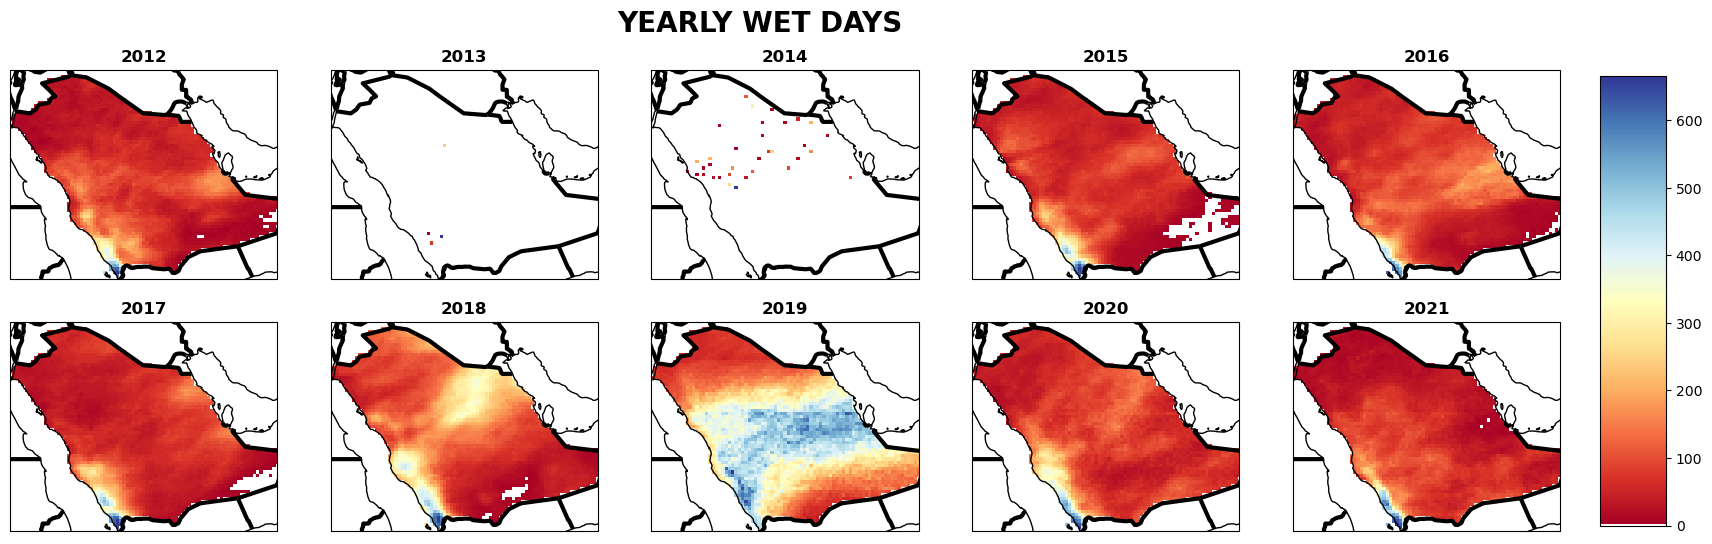

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(year[i], fontweight='bold')
    
    ax[i].set_extent ([34.5,55.0,32.5,16.5])
    
    cmap = plt.get_cmap('RdYlBu')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('RdYlBu', colors)
    
    cs = ax[i].pcolormesh(wet_days_per_year['lon'], wet_days_per_year['lat'], wet_days_per_year[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('YEARLY WET DAYS', fontweight='bold', fontsize=20)
plt.savefig('Yearly Wet Days Q3.png');

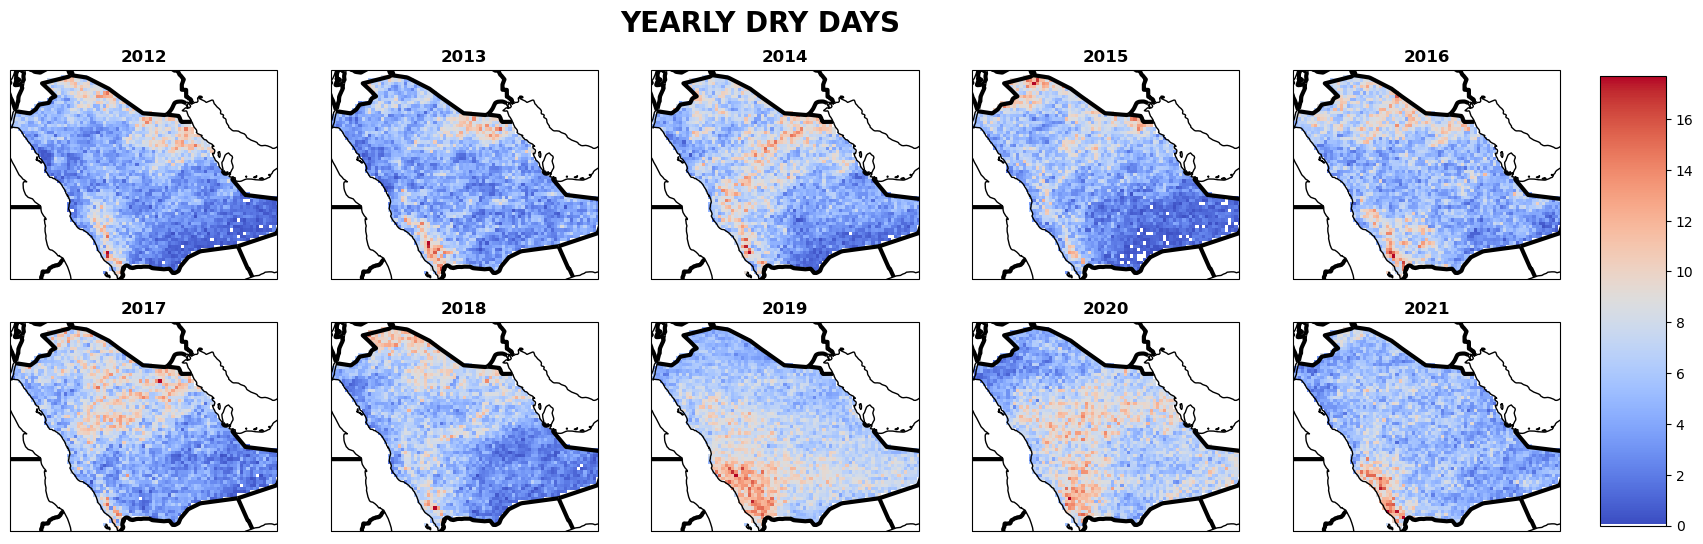

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(year[i], fontweight='bold')
    
    ax[i].set_extent ([34.5,55.0,32.5,16.5])
    
    cmap = plt.get_cmap('coolwarm')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('coolwarm', colors)
    
    cs = ax[i].pcolormesh(dry_days_per_year['lon'], dry_days_per_year['lat'], dry_days_per_year[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) 
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('YEARLY DRY DAYS', fontweight='bold', fontsize=20)
plt.savefig('Yearly Dry Days Q3.png');

# PRODUCING THE TIMESERIES

In [20]:
wet_days = Saudi.where(Saudi >= 1)
dry_days = Saudi.where(Saudi < 1)

# per month
wet_days_per_month = wet_days.groupby('datetime.month').sum(dim='datetime')
dry_days_per_month = dry_days.groupby('datetime.month').sum(dim='datetime')


# per year
wet_days_per_year = wet_days.resample(datetime='1Y').sum(dim='datetime')
dry_days_per_year = dry_days.resample(datetime='1Y').sum(dim='datetime')

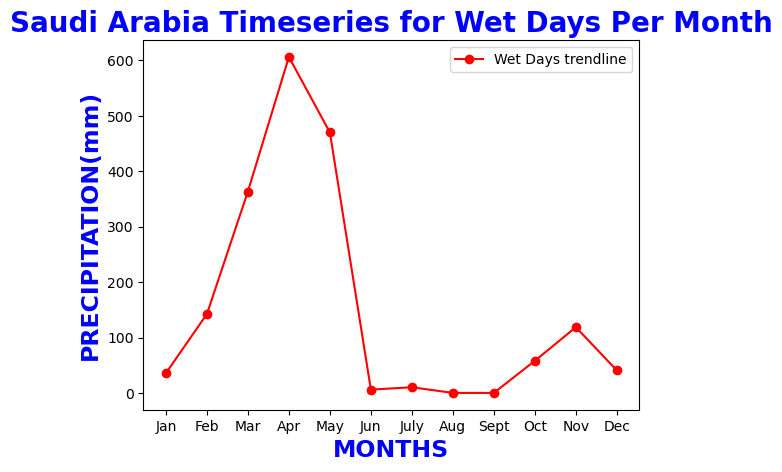

In [21]:
plt.plot(month, wet_days_per_month, marker ='o', color = 'red',label='Wet Days trendline')
plt.xlabel('MONTHS',fontweight = 'bold', fontsize = 17, color = 'blue')
plt.ylabel('PRECIPITATION(mm)', fontweight = 'bold', fontsize = 17,color = 'blue')
plt.title('Saudi Arabia Timeseries for Wet Days Per Month', fontweight ='bold' , fontsize = 20, color ='blue');
plt.legend()
plt.savefig('Monthly_Wet_Days_timeseries Q3.png')
plt.show()

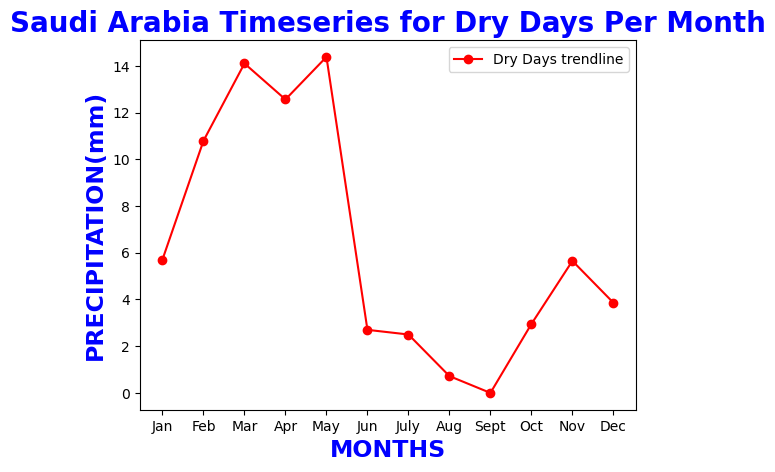

In [22]:
plt.plot(month, dry_days_per_month, marker ='o', color = 'red',label='Dry Days trendline')
plt.xlabel('MONTHS',fontweight = 'bold', fontsize = 17, color = 'blue')
plt.ylabel('PRECIPITATION(mm)', fontweight = 'bold', fontsize = 17,color = 'blue')
plt.title('Saudi Arabia Timeseries for Dry Days Per Month', fontweight ='bold' , fontsize = 20, color ='blue');
plt.legend()
plt.savefig('Monthly_Dry_Days_timeseries Q3.png')
plt.show()

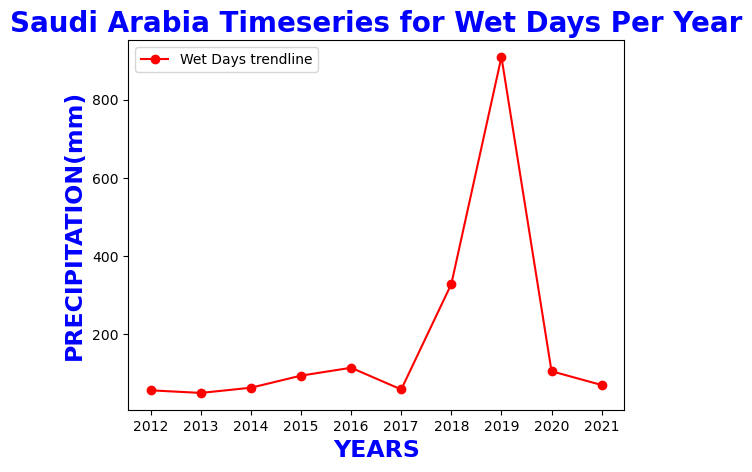

In [23]:
plt.plot(year, wet_days_per_year, marker ='o', color = 'red',label='Wet Days trendline')
plt.xlabel('YEARS',fontweight = 'bold', fontsize = 17, color = 'blue')
plt.ylabel('PRECIPITATION(mm)', fontweight = 'bold', fontsize = 17,color = 'blue')
plt.title('Saudi Arabia Timeseries for Wet Days Per Year', fontweight ='bold' , fontsize = 20, color ='blue');
plt.legend()
plt.savefig('Annual_Wet_Days_timeseries Q3.png')
plt.show()

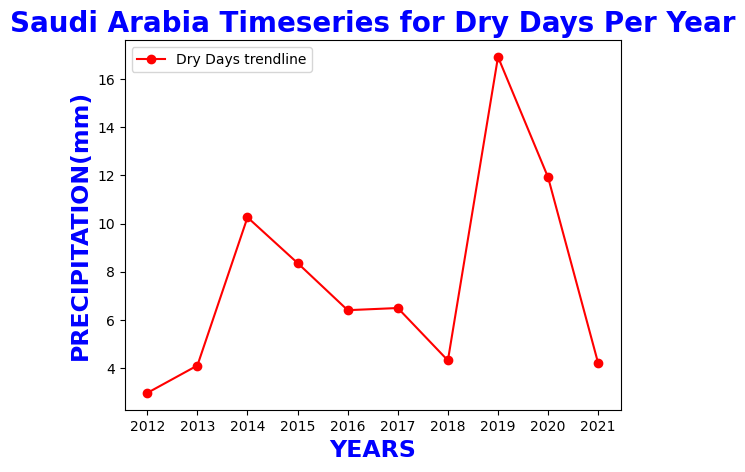

In [24]:
plt.plot(year, dry_days_per_year, marker ='o', color = 'red',label='Dry Days trendline')
plt.xlabel('YEARS',fontweight = 'bold', fontsize = 17, color = 'blue')
plt.ylabel('PRECIPITATION(mm)', fontweight = 'bold', fontsize = 17,color = 'blue')
plt.title('Saudi Arabia Timeseries for Dry Days Per Year', fontweight ='bold' , fontsize = 20, color ='blue');
plt.legend()
plt.savefig('Annual_Dry_Days_timeseries Q3.png')
plt.show()

# 4. COMPUTING THE NUMBER OF EXTREME RAINFALL DAYS FOR RR>10mm;RR>20mm PER MONTH AND PER YEAR

In [25]:
extreme_wet_days1 = Arabia.where(Arabia > 10, Arabia <20)
extreme_wet_days1

<xarray.DataArray 'precip' (datetime: 3653, lat: 65, lon: 86)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2012-01-01 2012-01-02 ... 2021-12-31
  * lon       (lon) float32 34.5 34.75 35.0 35.25 35.5 ... 55.0 55.25 55.5 55.75
  * lat       (lat) float32 32.5 32.25 32.0 31.75 31.5 ... 17.25 17.0 16.75 16.5
Attributes:
    grid_mapping:  crs

In [26]:
# per month
extreme_wet_days1_per_month = extreme_wet_days1.groupby('datetime.month').sum(dim='datetime')


# per year
extreme_wet_days1_per_year = extreme_wet_days1.resample(datetime='1Y').sum(dim='datetime')

In [27]:
extreme_wet_days2 = Arabia.where(Arabia > 20)
extreme_wet_days2

<xarray.DataArray 'precip' (datetime: 3653, lat: 65, lon: 86)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2012-01-01 2012-01-02 ... 2021-12-31
  * lon       (lon) float32 34.5 34.75 35.0 35.25 35.5 ... 55.0 55.25 55.5 55.75
  * lat       (lat) float32 32.5 32.25 32.0 31.75 31.5 ... 17.25 17.0 16.75 16.5
Attributes:
    grid_mapping:  crs

In [28]:
# per month
extreme_wet_days2_per_month = extreme_wet_days2.groupby('datetime.month').sum(dim='datetime')


# per year
extreme_wet_days2_per_year = extreme_wet_days2.resample(datetime='1Y').sum(dim='datetime')

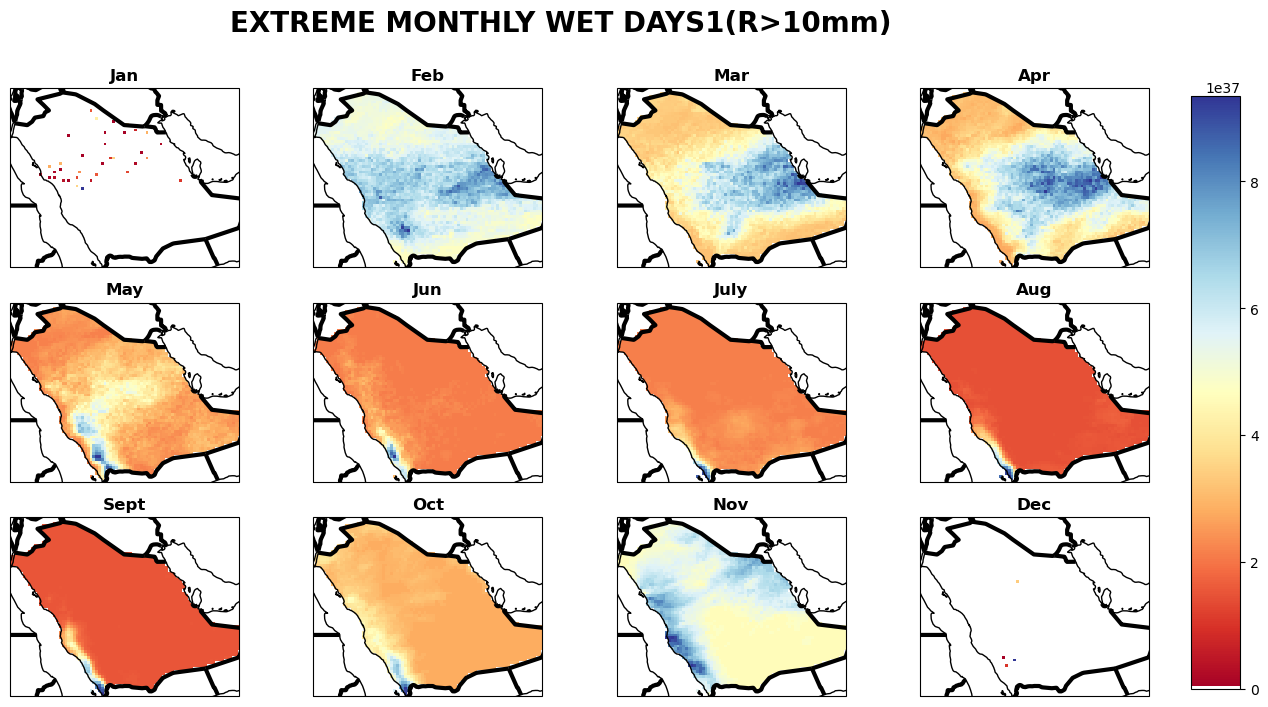

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(month[i], fontweight='bold')
    
    ax[i].set_extent ([34.5,55.0,32.5,16.5])
    
    cmap = plt.get_cmap('RdYlBu')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('RdYlBu', colors)
    
    cs = ax[i].pcolormesh(extreme_wet_days1_per_month['lon'], extreme_wet_days1_per_month['lat'], extreme_wet_days1_per_month[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('EXTREME MONTHLY WET DAYS1(R>10mm)', fontweight='bold', fontsize=20)
plt.savefig('Extreme Monthly wet Days1 Q4.png');

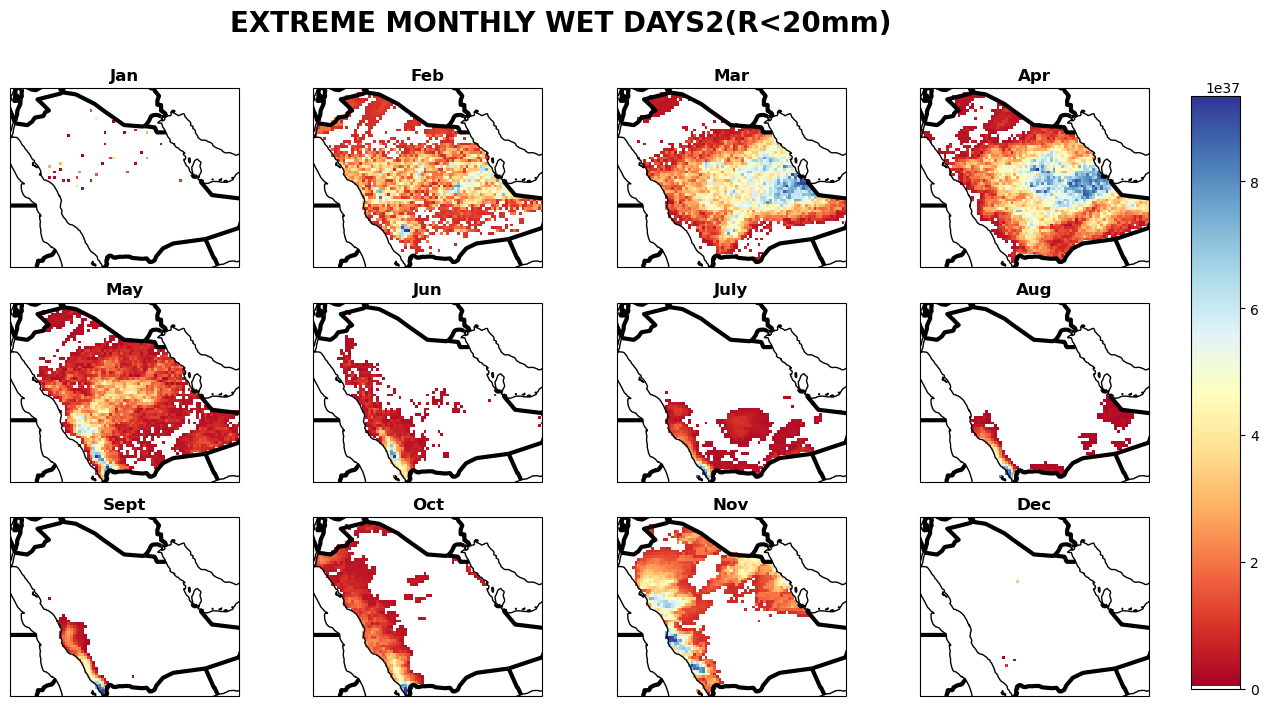

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(month[i], fontweight='bold')
    
    ax[i].set_extent ([34.5,55.0,32.5,16.5])
    
    cmap = plt.get_cmap('RdYlBu')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('RdYlBu', colors)
    
    cs = ax[i].pcolormesh(extreme_wet_days2_per_month['lon'], extreme_wet_days2_per_month['lat'], extreme_wet_days2_per_month[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('EXTREME MONTHLY WET DAYS2(R<20mm)', fontweight='bold', fontsize=20)
plt.savefig('Extreme Monthly wet Days2 Q4.png');

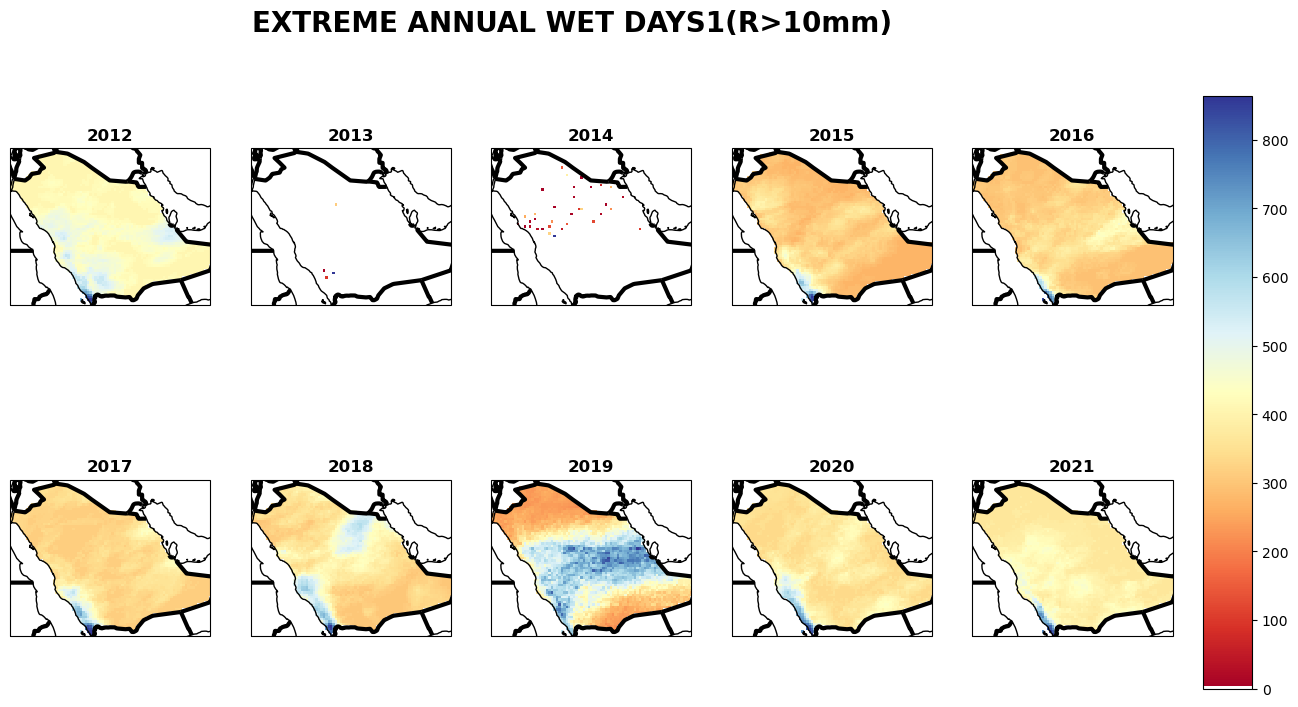

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(year[i], fontweight='bold')
    
    ax[i].set_extent ([34.5,55.0,32.5,16.5])
    
    cmap = plt.get_cmap('RdYlBu')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('RdYlBu', colors)
    
    cs = ax[i].pcolormesh(extreme_wet_days1_per_year['lon'], extreme_wet_days1_per_year['lat'], extreme_wet_days1_per_year[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('EXTREME ANNUAL WET DAYS1(R>10mm)', fontweight='bold', fontsize=20)
plt.savefig('Extreme Annually wet Days1 Q4.png');

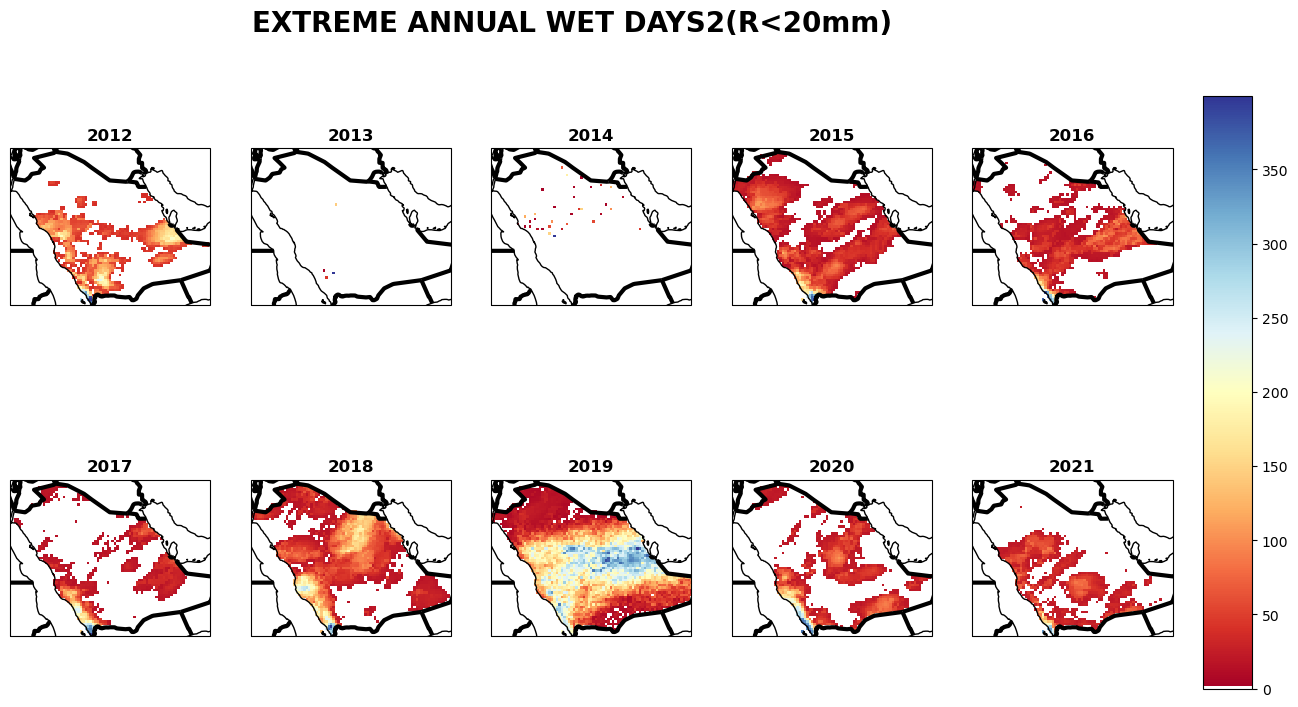

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(year[i], fontweight='bold')
    
    ax[i].set_extent ([34.5,55.0,32.5,16.5])
    
    cmap = plt.get_cmap('RdYlBu')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('RdYlBu', colors)
    
    cs = ax[i].pcolormesh(extreme_wet_days2_per_year['lon'], extreme_wet_days2_per_year['lat'], extreme_wet_days2_per_year[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('EXTREME ANNUAL WET DAYS2(R<20mm)', fontweight='bold', fontsize=20)
plt.savefig('Extreme Annually wet Days2 Q4.png');

# TIME SERIES

In [38]:
extreme_wet_days1 = Saudi.where(Saudi > 10,  Saudi> 20)
extreme_wet_days1_per_month = extreme_wet_days1.groupby('datetime.month').sum(dim='datetime')
extreme_wet_days1_per_year = extreme_wet_days1.resample(datetime='1Y').sum(dim='datetime')

In [39]:
extreme_wet_days2 = Saudi.where(Saudi > 20)
extreme_wet_days2_per_month = extreme_wet_days2.groupby('datetime.month').sum(dim='datetime')
extreme_wet_days2_per_year = extreme_wet_days2.resample(datetime='1Y').sum(dim='datetime')

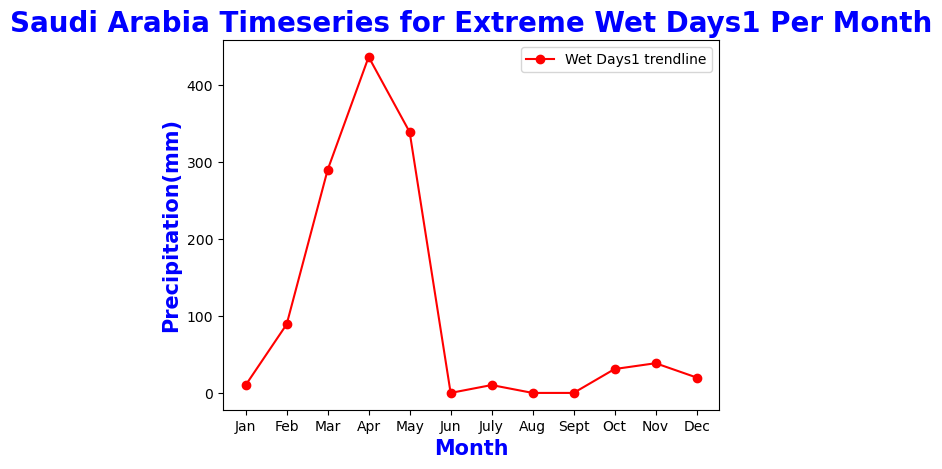

In [47]:
plt.plot(month, extreme_wet_days1_per_month, marker ='o',color = 'r', label='Wet Days1 trendline')
plt.xlabel('Month',fontweight = 'bold', fontsize = 15, color = 'blue')
plt.ylabel('Precipitation(mm)', fontsize = 15,color = 'blue' , fontweight = 'bold')
plt.title('Saudi Arabia Timeseries for Extreme Wet Days1 Per Month', fontsize = 20, fontweight = 'bold', color ='blue');
plt.legend()
plt.savefig('Extreme_Monthly_Wet_Days1_timeseries Q4.png')
plt.show()

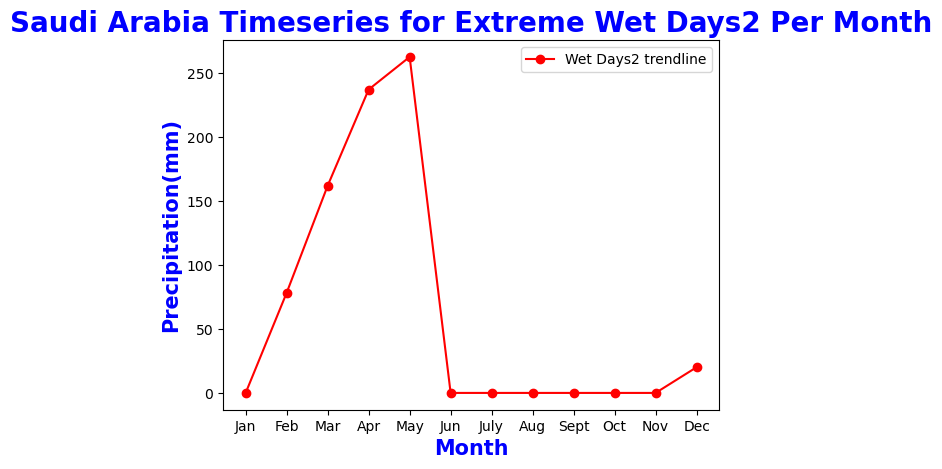

In [48]:
plt.plot(month, extreme_wet_days2_per_month, marker ='o',color = 'r', label='Wet Days2 trendline')
plt.xlabel('Month',fontweight = 'bold', fontsize = 15, color = 'blue')
plt.ylabel('Precipitation(mm)', fontsize = 15,color = 'blue' , fontweight = 'bold')
plt.title('Saudi Arabia Timeseries for Extreme Wet Days2 Per Month', fontsize = 20, fontweight = 'bold', color ='blue');
plt.legend()
plt.savefig('Extreme_Monthly_Wet_Days2_timeseries Q4.png')
plt.show()

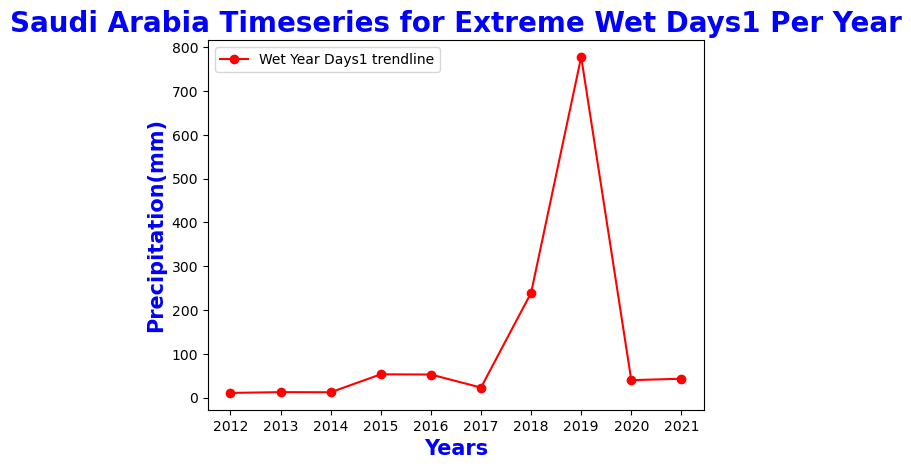

In [49]:
plt.plot(year, extreme_wet_days1_per_year, marker ='o',color = 'r', label='Wet Year Days1 trendline')
plt.xlabel('Years',fontweight = 'bold', fontsize = 15, color = 'blue')
plt.ylabel('Precipitation(mm)', fontsize = 15,color = 'blue' , fontweight = 'bold')
plt.title('Saudi Arabia Timeseries for Extreme Wet Days1 Per Year', fontsize = 20, fontweight = 'bold', color ='blue');
plt.legend()
plt.savefig('Extreme_Yearly_Wet_Days1_timeseries Q4.png')
plt.show()

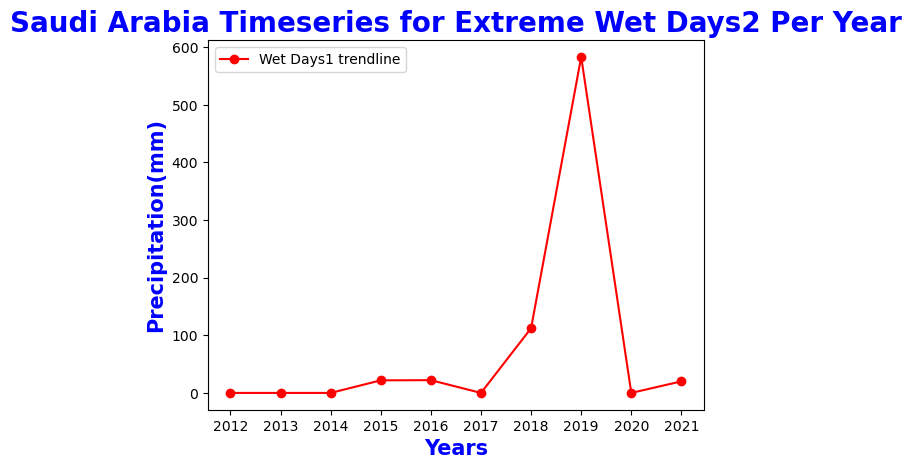

In [50]:
plt.plot(year, extreme_wet_days2_per_year, marker ='o',color = 'r', label='Wet Days1 trendline')
plt.xlabel('Years',fontweight = 'bold', fontsize = 15, color = 'blue')
plt.ylabel('Precipitation(mm)', fontsize = 15,color = 'blue' , fontweight = 'bold')
plt.title('Saudi Arabia Timeseries for Extreme Wet Days2 Per Year', fontsize = 20, fontweight = 'bold', color ='blue');
plt.legend()
plt.savefig('Extreme_Yearly_Wet_Days2_timeseries Q4.png')
plt.show()